In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(1200)

In [3]:
mymean = 300

In [4]:
# sample size
n = 1000

In [5]:
# number of samples
N = 2000

In [6]:
dist = scipy.stats.poisson.rvs(mu=mymean, size=n)

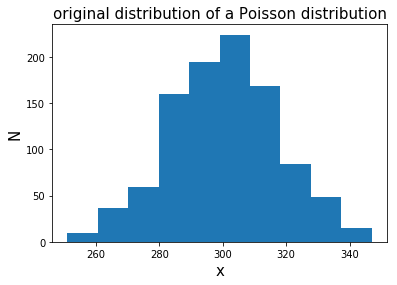

In [7]:
pl.hist(dist)
pl.xlabel('x', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('original distribution of a Poisson distribution', fontsize=15)

In [8]:
mysample = np.empty([N, n])
for i in range(0,N):
    #mysample[i] = np.random.poisson(mymean,size = n)
     mysample[i] = scipy.stats.poisson.rvs(mu=mymean, size=n)

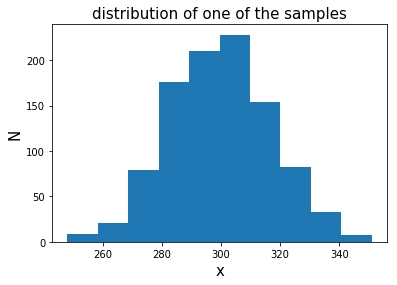

In [9]:
pl.hist(mysample[3])
pl.xlabel('x', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('distribution of one of the samples', fontsize=15)

In [10]:
def calculate_z(sample,mu = mymean,std = np.sqrt(mymean)):
    z = np.sqrt(len(sample)) * (mu - sample.mean()) / std
    return z

In [11]:
z = np.empty(N)
smean = np.empty(N)
for i in range(0,N):
    z[i] = calculate_z(mysample[i])
    smean[i] = mysample[i].mean()

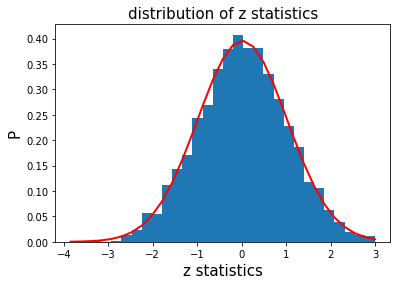

In [12]:
#pl.hist(z, normed=True)
count, bins, ignored = plt.hist(z, 30, normed=True)
mumeans = np.mean(z)
stdmeans = np.std(z)
plt.plot(bins, 1/(stdmeans * np.sqrt(2 * np.pi)) * np.exp( - (bins - mumeans)**2 / (2 * stdmeans**2) ), linewidth=2, color='r')
pl.xlabel('z statistics', fontsize = 15)
pl.ylabel('P', fontsize = 15)
pl.title('distribution of z statistics', fontsize=15)

In [13]:
scipy.stats.kstest(z, 'norm')

KstestResult(statistic=0.013393435702207301, pvalue=0.86564017934659532)

H0: Distribution of z statistic in this test follow a N(0,1) distribution
The KS test results show that the p value = 0.87 > 0.05, we cannot reject the null hypothesis. Distribution of z statistic in this test follow a N(0,1) distribution.